# Fourth assignment
The assignment provides problems regarding basic applications of linear algebra and machine learning. Use this notebook to perform the computations and insert your comments into it. All the coding must be done in Python 3. 

The assignment has to be submitted individually!

All your plots have to be labelled properly!  (Non-labeled plots will result in point deductions!)

**Non running cells/tasks will not be considered!**

The tasks/questions are 1.1), 1.2), 1.3), 1.4), 1.5), 1.6), 1.7), 2.1), 2.2), 2.3), 2.4), 2.5), 2.6). After each task description there is an answer cell for your code or text. For coding tasks they look like this:

```
# YOUR CODE HERE
```
(You can delete the "YOUR CODE HERE" comment, if you like.)

For markdown (text) cells the response cell will include this:

**WRITE YOUR ANSWER HERE**

Sometimes they are followed by test cells. You can run the test cells after you finished the task. If these cells don't show any errors, your answer is right. You can't/shouldn't edit test cells!

After you finished the notebook you can hit the "Validate" button on the top of the notebook to see if all test are good. You can also use the "Validate" button on the "Assignment" tap on the main page of python.ldv.ei.tum.de. Some tasks will be graded manually (e.g. plots, text answers). They don't have a following test cell. 

Please make sure to hit the "Submit" button on the "Assignment" tab on the main page of python.ldv.ei.tum.de before the deadline passes. You will get your final score after the deadline.

**Some tips:**
- Only change cells with `# YOUR CODE HERE` or **WRITE YOUR ANSWER HERE**
- Do not change cell types or the notebook name.
- Do not add other .ipynb files into the ami22 folder or subfolders.
- Do not override the original files in the ami22 folder or subfolders.
- For every plot makes sure that axes are correctly labeled with original labels and not encoded ones. 
- If you are asked to provide multiple plots, make sure that the titles are clear. A plot should be self explanatory, we should not have to look at your code to know what is plotted. 

#### Date of submission: May 30, 2022, 23:55 hrs

In [1]:
'''
You do not need to run this cell multiple times.
In your homework you will not need to install any packages.
'''
%pip install mlxtend --quiet --exists-action i

Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from mlxtend.evaluate import BootstrapOutOfBag
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, ShuffleSplit, cross_validate
import pandas as pd
import numpy as np
import seaborn as sns

In this notebook we will look at different validation methods. In order to know the "real"/best linear model, we will work with artificially generated data.

In [3]:
def gen_data(n_samp, n_feat, noise_std, bias, outlier_strength):
    X, y, true_coef = make_regression(n_samples=n_samp, n_informative=n_feat-1, n_features=n_feat, random_state=43, noise=noise_std,bias=bias, coef=True)
    true_intercept=bias
    return X,y,true_coef, true_intercept

X, y, true_coef, true_intercept = gen_data(n_samp=300,n_feat=3,noise_std=3.3,bias=0.3, outlier_strength=0)

For benchmarking we will need the true model, which is actually the linear model underlying the generated data. There will be no better linear model for the given data. In order to be able to use this like a regular LinearRegression we use an own class which always keeps the coefficients and intercept provided even during additional training.

In [4]:
from sklearn.linear_model import LinearRegression
class FixedCoefLinearRegression(LinearRegression):
    def __init__(self, fixed_coef, fixed_intercept):
        super(FixedCoefLinearRegression, self).__init__()
        self.fixed_coef = fixed_coef
        self.fixed_intercept = fixed_intercept
    def fit(self, X, y, sample_weight=None):
        self.coef_ = self.fixed_coef
        self.intercept_ = self.fixed_intercept
lr_true = FixedCoefLinearRegression(fixed_coef=true_coef, fixed_intercept=true_intercept)

Another interesting estimator for benchmarking is a model that does not actually learn anything. In regression, for example, such a model would always predict the mean value of the target (estimated from the training set).

**Task 1.1**

Create a so called Dummy Estimator for regression using sklearn. Use the default values (meaning the strategy will be 'mean'). Store the estimator in the variable `lr_dummy`.

In [5]:
# YOUR CODE HERE
from sklearn.dummy import DummyRegressor
lr_dummy = DummyRegressor(strategy="mean")

**Task 1.2** 

As the generated data is for a linear problem you will have to define a `LinearRegression()` object with default parameters and store it in the variable `lr`. You do not have to fit it.

In [6]:
# YOUR CODE HERE
lr = LinearRegression()

Now we have three models: the optimal model for the data at hand `lr_true`, the worst-case baseline `lr_dummy` and the usual `lr` which will be fitted to the data. Next we want to use the RMSE which we used during the last sessions.

**Task 1.3**

Write a function `root_mean_squared_error(y, y_pred)` which calculates the RMSE between the true values `y` and the predicted values `y_pred`! *(We will only use/test the function with 1 dimensonal data, no need to make it work for matrices.)*

In [7]:
def root_mean_squared_error(y, y_pred):
    # YOUR CODE HERE
    rmse = np.sqrt(mean_squared_error(y, y_pred))
    return rmse

**Task 1.4**

Which of the following plots shows the correct visualization of the error that is used to calculate the RMSE?

The blue line represents our linear regression model.

![error](error.svg)

'a': left.

'b': middle

'c': right

*Use a variable* `x14` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x14='e'`. *There is only one correct answer.*

In [8]:
# YOUR CODE HERE
x14='a'
print('The answer is ' + x14 + '.')

The answer is a.


**Taks 1.5**

What is the advantage of the RMSE over the MSE?

'a': The error has the same unit as the target variables.

'b': The RMSE is more robust because squaring can exacerbate large errors on some samples.

'c': The RMSE is independent of the range of the target variable.

'd': The RMSE is numerically more stable than MSE.

*Use a variable* `x15` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x15='e'`. *There is only one correct answer.*

In [9]:
# YOUR CODE HERE
x15='a'
print('The answer is ' + x15 + '.')

The answer is a.


**Task 1.6**

Write a function `r_pearson(y,y_pred)` which calculates the the pearson correlation between the true values `y` and the predicted values `y_pred`! *(We will only use/test the function with 1 dimensonal data, no need to make it work for matrices.)*

In [10]:
def r_pearson(y, y_pred):
    # YOUR CODE HERE
    rp = np.corrcoef(y, y_pred)
    return rp

**Task 1.7**

In the remaining part of the notebook, you will be using sklearns `cross_validate()` routine. If we want to use our metrics from above within the cross validation, we have to make them callable for `cross_validate()`. Use the function `make_scorer()` with default parameters to create a scorer for the rmse and call the variable `rmse_scorer`. Repeat the process for the pearson correlation and call the variable `rp_scorer`!

In [11]:
from sklearn.metrics import make_scorer
# YOUR CODE HERE
rmse_scorer = make_scorer(root_mean_squared_error)
rp_scorer =  make_scorer(r_pearson)

In the next part you will run several experiments with different validation techniques. At first a grid of several number of splits/k-values is defined which will be used for the three different validation techniques.

In [12]:
k_max = 280 #second largest k (max for generating the grid)
ks = np.array([2,3,5,10]) 
ks = np.append(ks,np.arange(15,k_max, 20)) #grid of k values
ks = np.append(ks,X.shape[0]) #k=n_samples
print('k or number of splits for the following validation experiments:\n ', ks)

k or number of splits for the following validation experiments:
  [  2   3   5  10  15  35  55  75  95 115 135 155 175 195 215 235 255 275
 300]


The first stop in your validation journey will be the technique of _Resampling_. There is already code provided in the cell below to record the results for later inspection and plotting. 

**Task 2.1**

Within the already given for-loop, generate a random permutation cross-validator which resembles the resampling technique. Set the arguments as follows: 
- `n_splits=kk`
- `test_size=0.37` 
- `random_state=350` 

Store the cross-val object in the variable `cv`.

Next, use the sklearn function `cross_validate()` to run the experiments and store the return values in the variable `c_v`. Use the following arguments:
- estimator: `lr` (your LinearRegression object)
- X, y: `X` and `y`
- `cv=cv` (your cv object to mimic Resampling)
- `scoring=rmse_scorer` (your scorer for the RMSE)
- `return_train_score=True`

Furthermore, the cross-validation function should return the estimator!
Running the cell will yield to two pandas data frames. One will contain the RMSEs on the test data in each cv-run and the other the regression coefficients of the different models.

In [13]:
re_cf = pd.DataFrame()
re_rmse = pd.DataFrame()
for kk in ks:
    # YOUR CODE HERE
    cv = ShuffleSplit(n_splits=kk, test_size=0.37, random_state=350)
    c_v = cross_validate(lr, X, y, cv=cv,scoring=rmse_scorer,return_train_score=True,return_estimator=True)
    re_rmse = re_rmse.append(pd.DataFrame({'splits': kk*np.ones(len(c_v['test_score'])),'set': len(c_v['test_score'])*['test'],'model': len(c_v['test_score'])*['lr'],'type': len(c_v['test_score'])*['resampling'] , 'RMSE': c_v['test_score']}),ignore_index=True)
    re_rmse = re_rmse.append(pd.DataFrame({'splits': kk*np.ones(len(c_v['train_score'])),'set': len(c_v['train_score'])*['train'], 'model': len(c_v['train_score'])*['lr'],'type': len(c_v['train_score'])*['resampling'] , 'RMSE': c_v['train_score']}),ignore_index=True)
    tmp = pd.DataFrame([true_coef-est.coef_ for est in c_v['estimator']])
    tmp['diff_intercept'] = [true_intercept-est.intercept_ for est in c_v['estimator']]
    tmp['splits'] = kk*np.ones((len(tmp)))
    tmp['type'] = 'resampling'
    re_cf = re_cf.append(tmp)
re_cf.columns = ['diff_coef_' + str(i) for i in range(len(true_coef))] + ['diff_intercept'] + ['splits'] + ['type']

**Task 2.2**

Next stop: *k-Fold*. Within the already given for-loop, generate a k-fold cross-validator. Set the arguments as follows: 
- `n_splits=kk`
- `shuffle=true` 
- `random_state=350` 

Store the cross-val object in the variable `cv`.

Next, use the sklearn function `cross_validate()` to run the experiments and store the return values in the variable `c_v`. Use the following arguments:
- estimator: `lr` (your LinearRegression object)
- X,y: `X` and `y`
- `cv=cv` (your cv object to mimic k-Fold)
- `scoring=rmse_scorer` (your scorer for the RMSE)
- `return_train_score=True`

Furthermore, the cross-validation function should return the estimator!
Running the cell will yield to two pandas data frames. One will contain the RMSEs on the test data in each cv-run and the other the regression coefficients of the different models.

In [14]:
kf_cf = pd.DataFrame()
kf_rmse = pd.DataFrame()
for kk in ks:
    # YOUR CODE HERE
    cv = KFold(n_splits=kk, random_state=350, shuffle=True)
    c_v = cross_validate(lr, X, y, cv=cv,scoring=rmse_scorer,return_train_score=True,return_estimator=True)
    kf_rmse = kf_rmse.append(pd.DataFrame({'splits': kk*np.ones(len(c_v['test_score'])),'set': len(c_v['test_score'])*['test'],'model': len(c_v['test_score'])*['lr'], 'type': len(c_v['test_score'])*['kfold'] , 'RMSE': c_v['test_score']}),ignore_index=True)
    kf_rmse = kf_rmse.append(pd.DataFrame({'splits': kk*np.ones(len(c_v['train_score'])),'set': len(c_v['train_score'])*['train'], 'model': len(c_v['train_score'])*['lr'],'type': len(c_v['train_score'])*['kfold'] , 'RMSE': c_v['train_score']}),ignore_index=True)
    tmp = pd.DataFrame([true_coef-est.coef_ for est in c_v['estimator']])
    tmp['diff_intercept'] = [true_intercept-est.intercept_ for est in c_v['estimator']]
    tmp['splits'] = kk*np.ones((len(tmp)))
    tmp['type'] = 'kfold'
    kf_cf = kf_cf.append(tmp)
kf_cf.columns = ['diff_coef_' + str(i) for i in range(len(true_coef))] + ['diff_intercept'] + ['splits'] + ['type']

**Task 2.3**

Last but not least you will investigate the behaviour of out-of-bag *bootstrapping*. There is no sklearn function which implements this technique. Fortunately, there is a cross-validator in the library _mlxtend_ which does the job and behaves like a sklearn cross-validator. 

Within the already given for-loop, generate a `BootstrapOutOfBag()` cross-validator from mlxtend. Set the arguments as follows: 
- `n_splits=int(kk)`
- `random_seed=350` 

Store the cross-val object in the variable `cv`.

Next, use the sklearn function `cross_validate()` to run the experiments and store the return values in the variable `c_v`. Use the following arguments:
- estimator: `lr` (your LinearRegression object)
- X,y: `X` and `y`
- `cv=cv` (your cv object to mimic Bootstrapping)
- `scoring=rmse_scorer` (your scorer for the RMSE)
- `return_train_score=True`

Furthermore, the cross-validation function should return the estimator!
Running the cell will yield to two pandas data frames. One will contain the RMSEs on the test data in each cv-run and the other the regression coefficients of the different models.

In [15]:
bs_cf = pd.DataFrame()
bs_rmse = pd.DataFrame()
for kk in ks:
    # YOUR CODE HERE
    cv = BootstrapOutOfBag(n_splits=int(kk),random_seed=350)
    c_v = cross_validate(lr, X, y, cv=cv,scoring=rmse_scorer,return_train_score=True,return_estimator=True)
    bs_rmse = bs_rmse.append(pd.DataFrame({'splits': kk*np.ones(len(c_v['test_score'])), 'set': len(c_v['test_score'])*['test'],'model': len(c_v['test_score'])*['lr'],'type': len(c_v['test_score'])*['bootstrap'] , 'RMSE': c_v['test_score']}),ignore_index=True)
    bs_rmse = bs_rmse.append(pd.DataFrame({'splits': kk*np.ones(len(c_v['train_score'])),'set': len(c_v['train_score'])*['train'], 'model': len(c_v['train_score'])*['lr'],'type': len(c_v['train_score'])*['bootstrap'] , 'RMSE': c_v['train_score']}),ignore_index=True)
    tmp = pd.DataFrame([true_coef-est.coef_ for est in c_v['estimator']])
    tmp['diff_intercept'] = [true_intercept-est.intercept_ for est in c_v['estimator']]
    tmp['splits'] = kk*np.ones((len(tmp)))
    tmp['type'] = 'bootstrap'
    bs_cf = bs_cf.append(tmp)
bs_cf.columns = ['diff_coef_' + str(i) for i in range(len(true_coef))] + ['diff_intercept'] + ['splits'] + ['type']

**Task 2.4**

Which of the following statements is wrong?

'a': The bootstrap sample has the same size as the entire dataset.

'b': Training and test set are disjunct when using Out-Of-Bag-Bootstrap.

'c': Bootstrap can introduce bias especially for small datasets.

'd': The number of Out-Of-Bag samples is constant for different splits.

*Use a variable* `x24` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x24='e'`. *There is only one correct answer.*

In [16]:
# YOUR CODE HERE
x24='d'
print('The answer is ' + x24 + '.')

The answer is d.


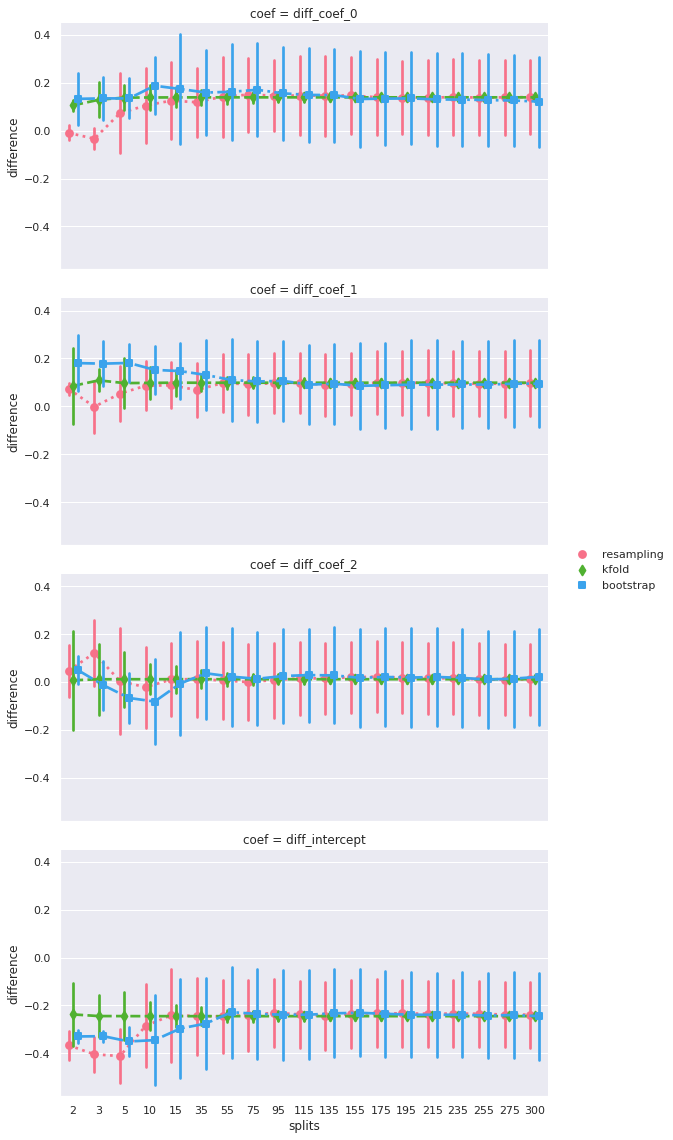

In [17]:
sns.set_theme()
kf_pl = pd.melt(kf_cf, id_vars=['splits','type'], value_vars=['diff_coef_0', 'diff_coef_1','diff_coef_2', 'diff_intercept'],value_name='difference', var_name='coef')
re_pl = pd.melt(re_cf, id_vars= ['splits','type'], value_vars=['diff_coef_0', 'diff_coef_1','diff_coef_2', 'diff_intercept'],value_name='difference', var_name='coef')
bs_pl = pd.melt(bs_cf, id_vars= ['splits','type'], value_vars=['diff_coef_0', 'diff_coef_1','diff_coef_2', 'diff_intercept'],value_name='difference', var_name='coef')
all_coef = pd.concat([re_pl, kf_pl, bs_pl], axis=0)
g = sns.FacetGrid(all_coef, row="coef", height=4, aspect=2)
g.map(sns.pointplot, "splits", "difference", "type", hue_order = ['resampling', 'kfold', 'bootstrap'],order=bs_cf.splits.unique(), linestyles=[':', '--','-.'],markers=['o','d','s'],dodge=.35,ci='sd',palette='husl')
g.add_legend()
g.tight_layout()
g.set_xticklabels(ks)

In the plot above you see the mean (marker) +/- the standard deviation (vertical line) of the difference between the true coefficients and the estimated coefficients(`true_coef-lr.coef_`). 

**Task 2.5**

Why is the standard deviation for the k-fold technique decreasing with increasing number of folds (for non highly correlated datasets)?

'a': The greater k, the more similar the test folds. More similar test folds lead to more similar coefficients.

'b': The greater k, the more samples are in the train-folds. More similar training folds lead to more similar coefficients.  

'c': The standard deviation of the coefficients is independent of k, the observerd result is only valid for the data at hand.

'd': It can be shown that the standard deviation of the coefficients is inversly proportional to k.


*Use a variable* `x25` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x25='e'`. *There is only one correct answer.*

In [18]:
# YOUR CODE HERE
x25='b'
print('The answer is ' + x25 + '.')

The answer is b.


![all](RMSE_all.svg)

In the plot above you see the mean (marker) +/- the standard deviation (vertical line) of the RMSE on train and test sets during the differenct cv's.

**Task 2.6**

Which of the following statements is not true?


'a': The RMSE for the true model is fluctuating due to the different sets to evaluate the model.

'b': In k-fold the model will see all samples at least one time in a training fold.  

'c': For an overfitted model the RMSE on the training set is in general lower than on the test set.

'd': Always choose the validation method which leads to the smallest test error (on average).


*Use a variable* `x26` *and assign your answer of the question (if 'e' would be the correct answer your code should look like this:* `x26='e'`. *There is only one correct answer.*

In [20]:
# YOUR CODE HERE
x26='d'
print('The answer is ' + x26 + '.')

The answer is d.
